In [1]:
import pandas as pd 
import env as env
import os
import wrangle as w

# data visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# stats data 
import scipy.stats as stats
import statsmodels.formula.api as smf


1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

7. Come up with some initial hypotheses based on your goal of predicting property value.

8. Visualize all combinations of variables in some way.

9. Run the appropriate statistical tests where needed.

10. What independent variables are correlated with the dependent variable, home value?

11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

13. Explore your dataset with any other visualizations you think will be helpful.

## EDA with dropped nulls and outliers:

In [2]:
df=w.data_set()

In [3]:
df=w.wrangle_data(df)

In [4]:
df.head()

,id,parcelid,bathrooms,bedrooms,area,taxvalue,yearbuilt,taxamount,county
4,20,11324547,2.0,4,3633,296425,2005,6941.39,LA
6,31,11544747,4.0,3,1620,847770,2011,10244.94,LA
7,33,11585547,2.0,3,2077,646760,1926,7924.68,LA
11,62,11954547,0.0,0,1200,5328,1972,91.60,LA
14,97,12537947,0.0,0,171,6920,1973,255.17,LA


In [5]:
train,validate,test=w.split_data(df)

In [6]:
train.head()

,id,parcelid,bathrooms,bedrooms,area,taxvalue,yearbuilt,taxamount,county
1571798,2176655,14455139,2.5,4,2987,885000,2006,13617.38,Orange
1723553,2387407,10744163,2.0,3,3013,489511,1977,5768.57,LA
718174,994436,13058070,3.0,4,2572,390915,1986,4944.11,LA
1663205,2303831,12408853,1.0,3,1589,321758,1959,4031.78,LA
1087891,1506948,17148379,2.0,3,1727,231737,1962,2708.80,Ventura


In [7]:
train.shape

(1219902, 9)

3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [8]:
train_sample=train.sample(1_000,random_state=123)

In [33]:
def plot_variable_pairs(df):
    cols = ['bedrooms', 'bathrooms', 'area', 'taxvalue','yearbuilt','taxamount']
    sns.pairplot(df[cols], kind='reg')
    plt.show()

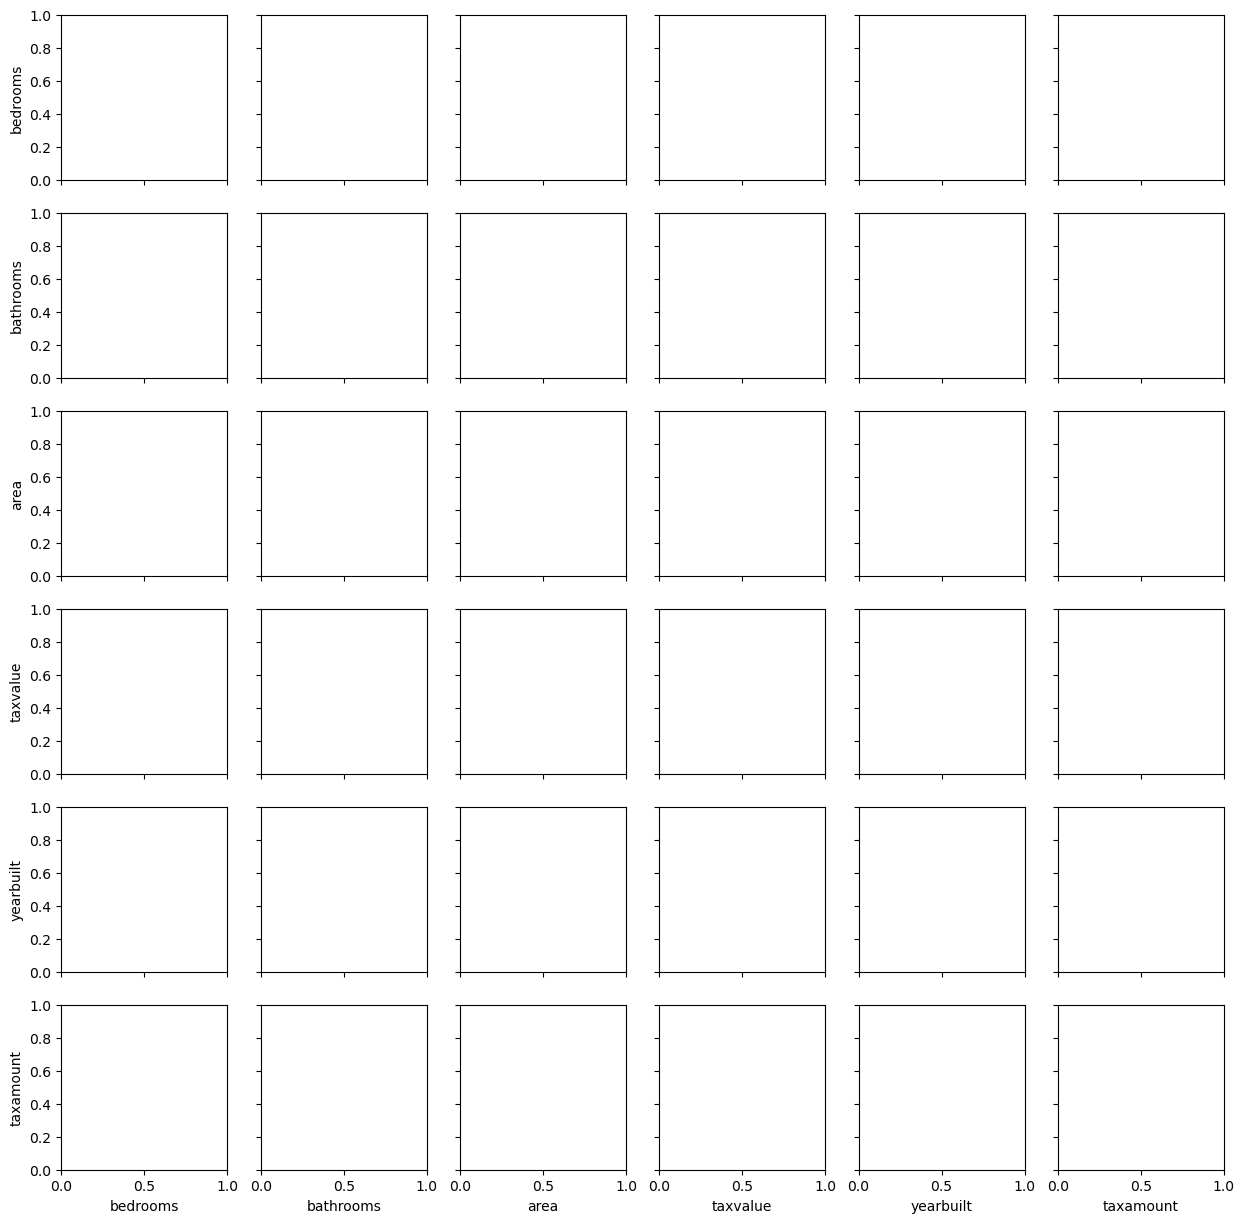

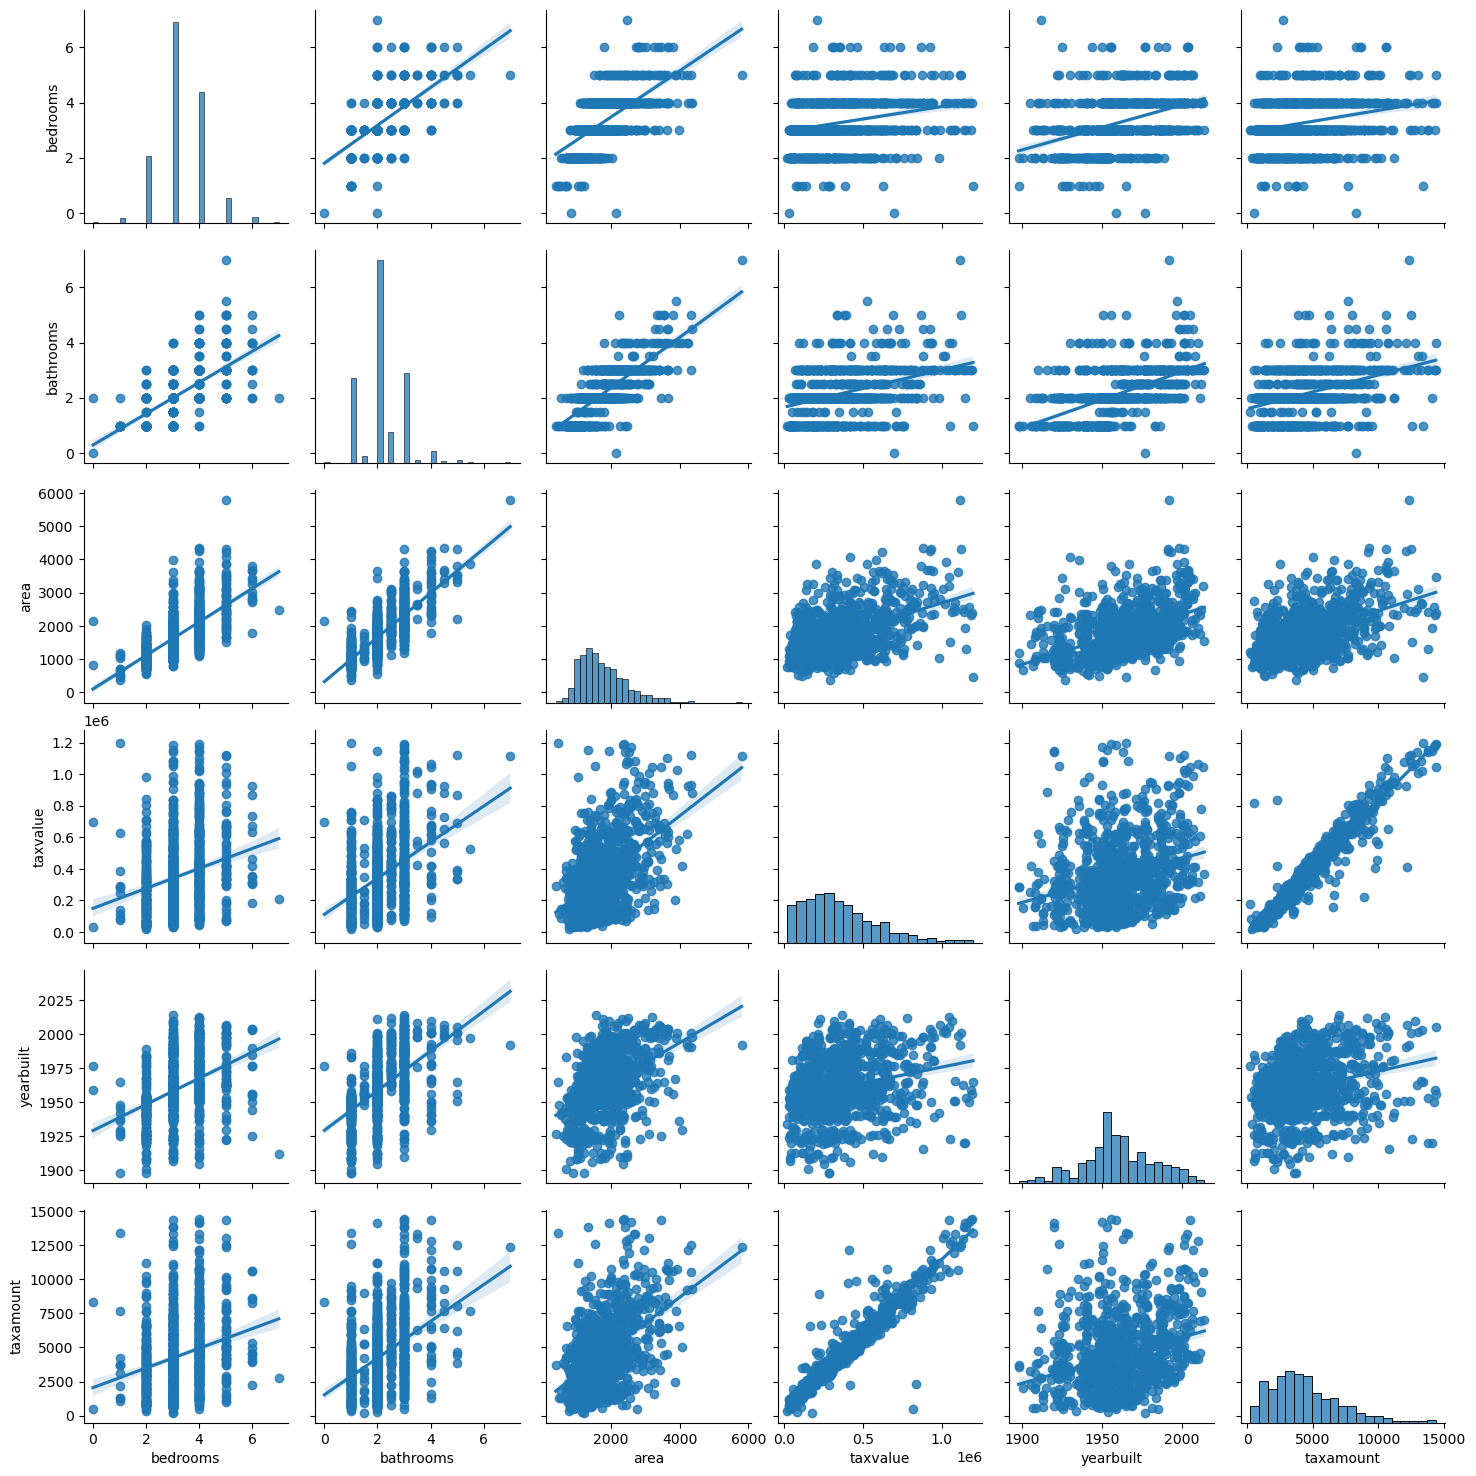

In [34]:
plot_variable_pairs(train_sample)

In [11]:
def plot_categorical_and_continuous_vars(df, cat_var, cont_var):
    for var in cont_var:
        # Create a box plot
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=cat_var, y=var, data=df)
        plt.axhline(y=df[var].mean(), color='r', linestyle='--')
        plt.xlabel(cat_var)
        plt.ylabel(var)
        plt.title(f'{cat_var} vs. {var}')
        plt.show()

        # Create a violin plot
        plt.figure(figsize=(12, 6))
        sns.violinplot(x=cat_var, y=var, data=df)
        plt.axhline(y=df[var].mean(), color='r', linestyle='--')
        plt.xlabel(cat_var)
        plt.ylabel(var)
        plt.title(f'{cat_var} vs. {var}')
        plt.show()

        # Create a swarm plot
        plt.figure(figsize=(12, 6))
        sns.swarmplot(x=cat_var, y=var, data=df)
        plt.axhline(y=df[var].mean(), color='r', linestyle='--')
        plt.xlabel(cat_var)
        plt.ylabel(var)
        plt.title(f'{cat_var} vs. {var}')
        plt.show()


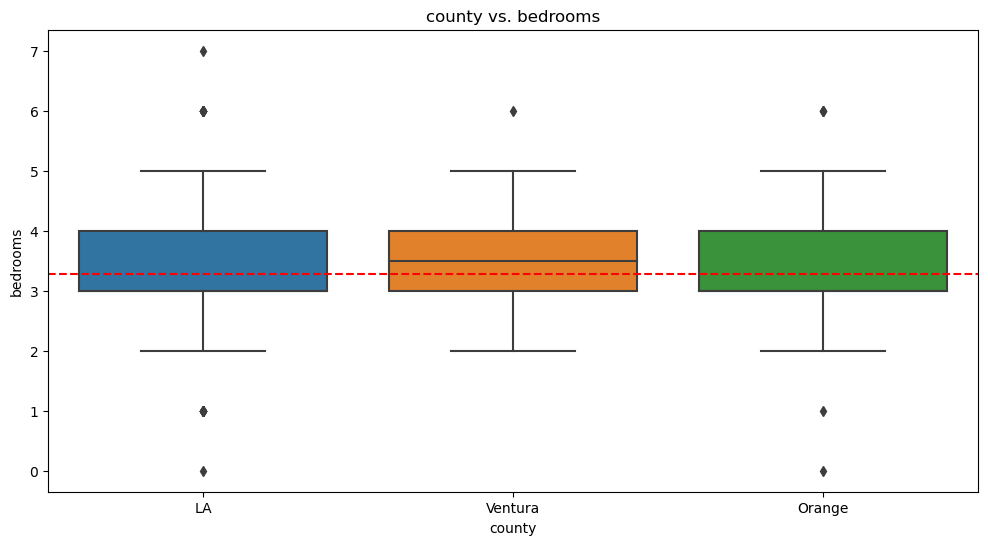

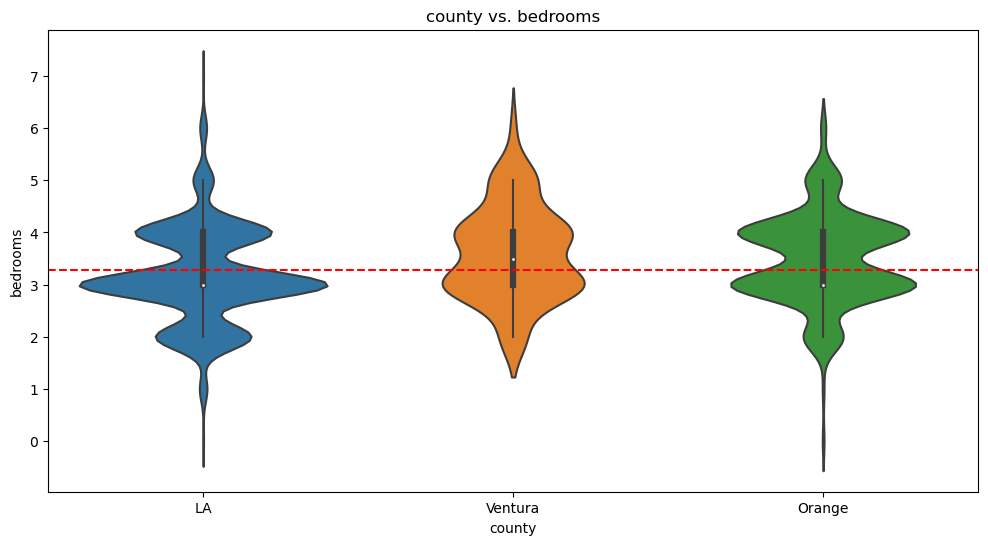

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


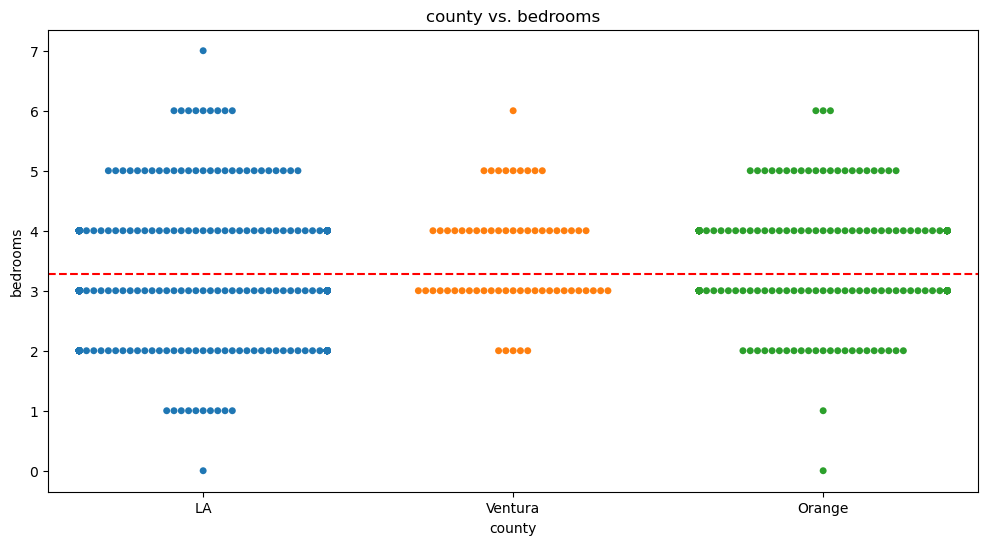

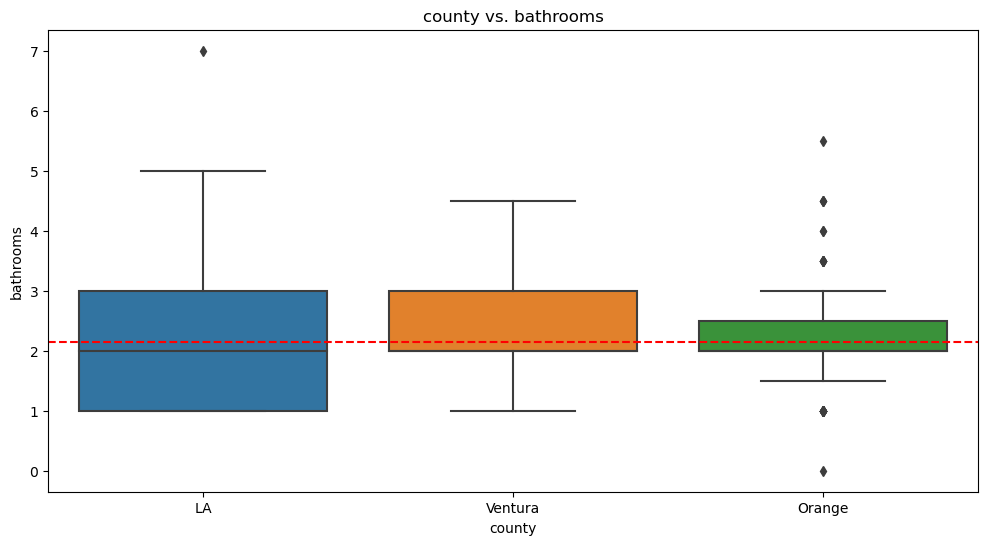

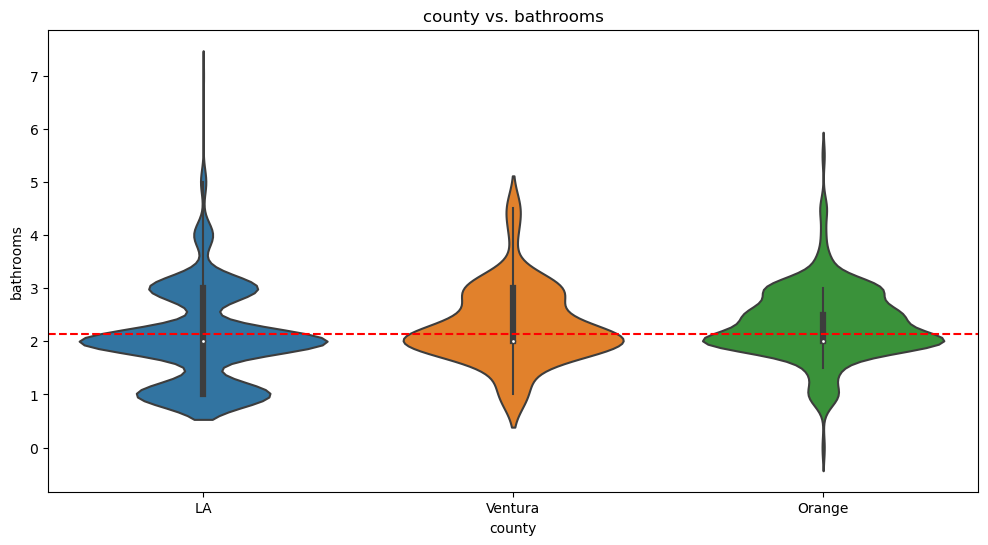

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 79.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 43.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


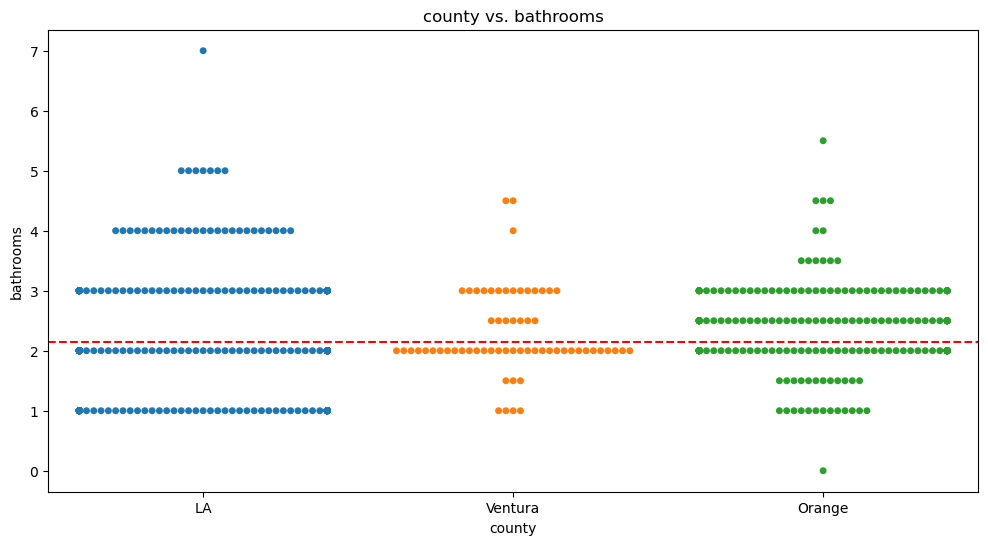

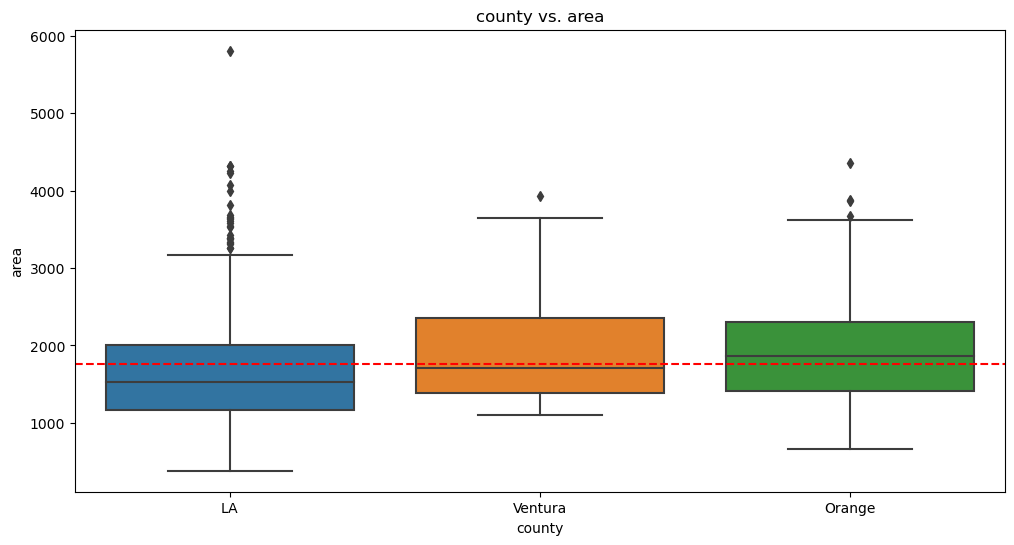

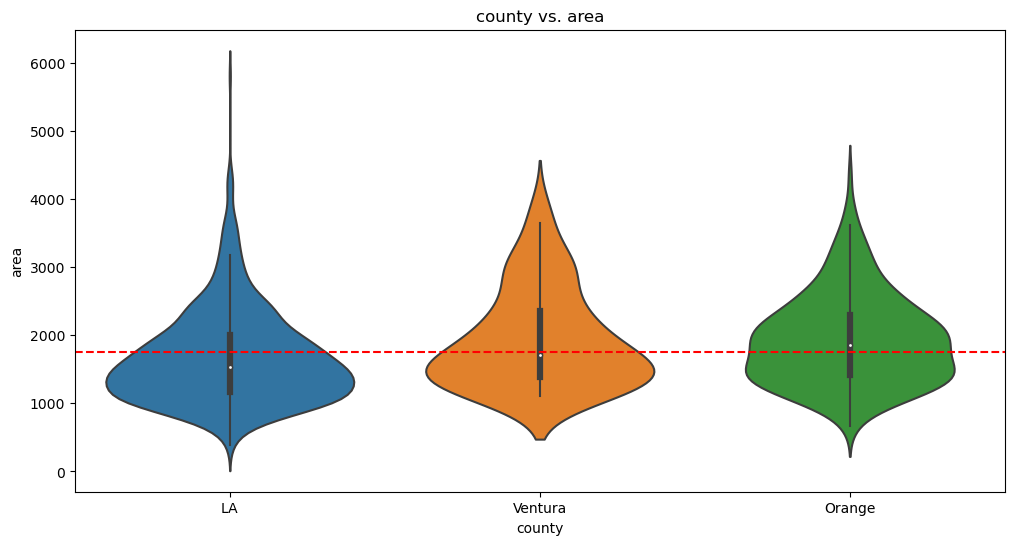

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


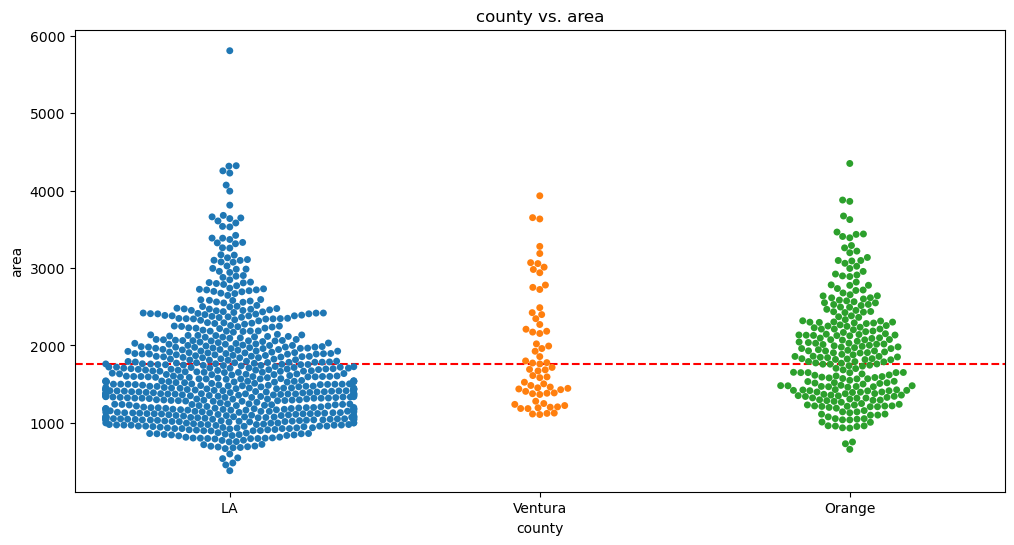

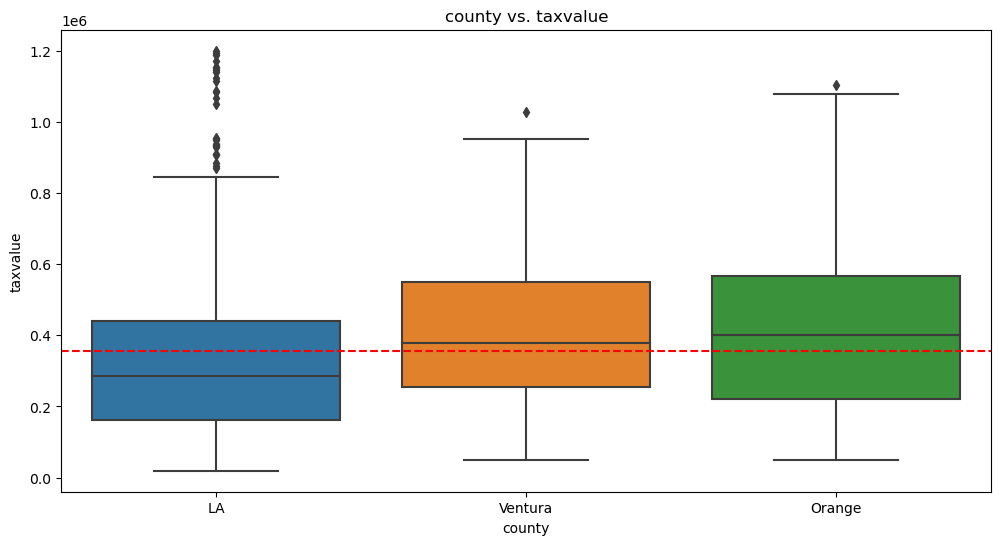

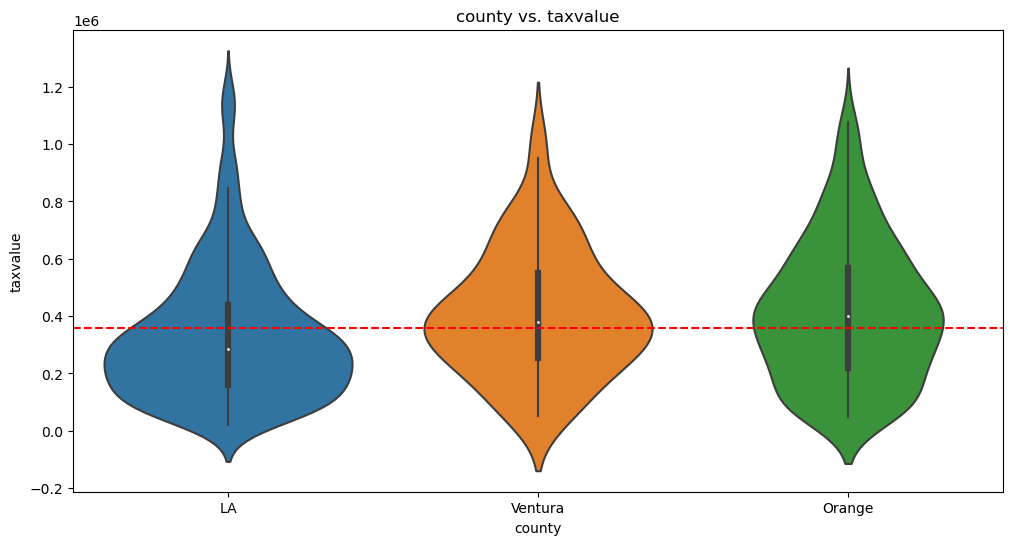

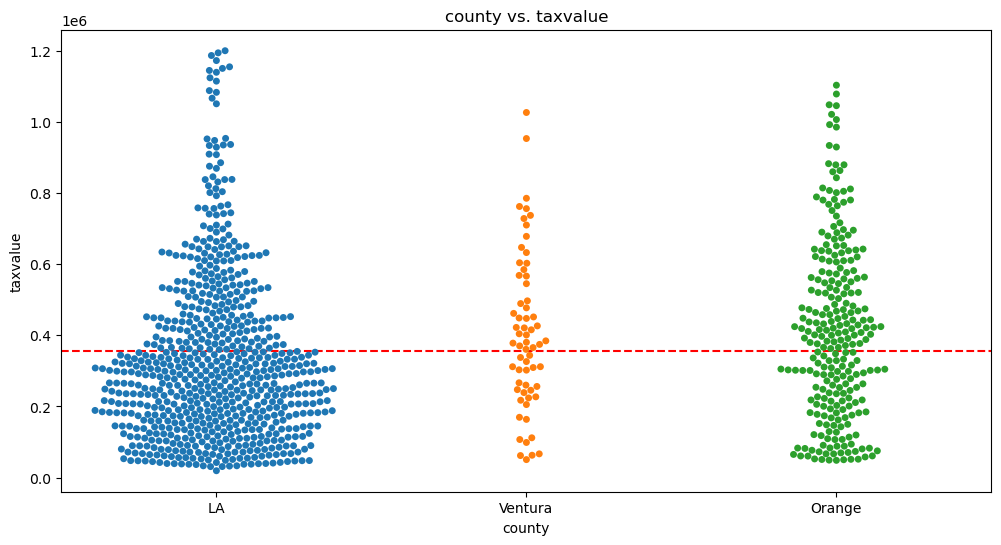

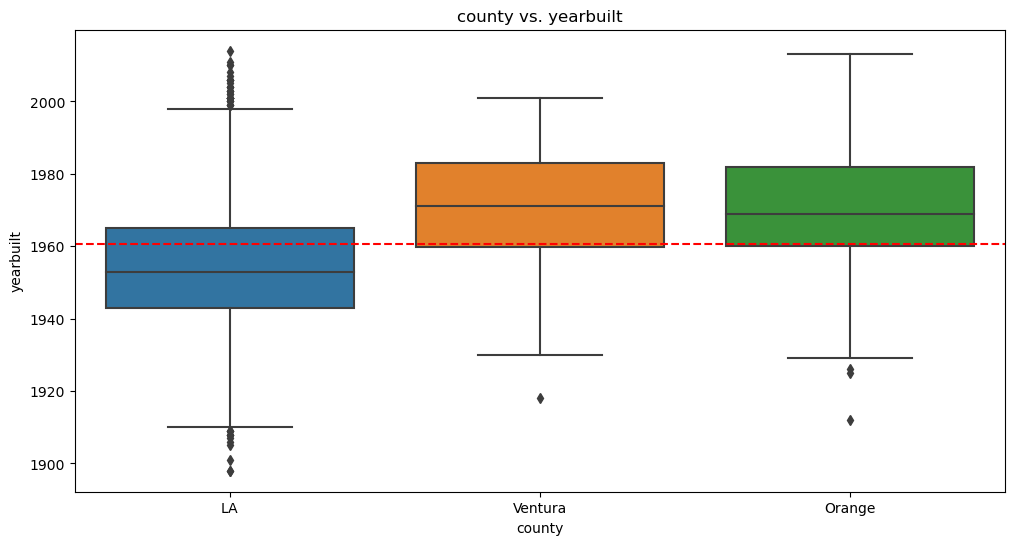

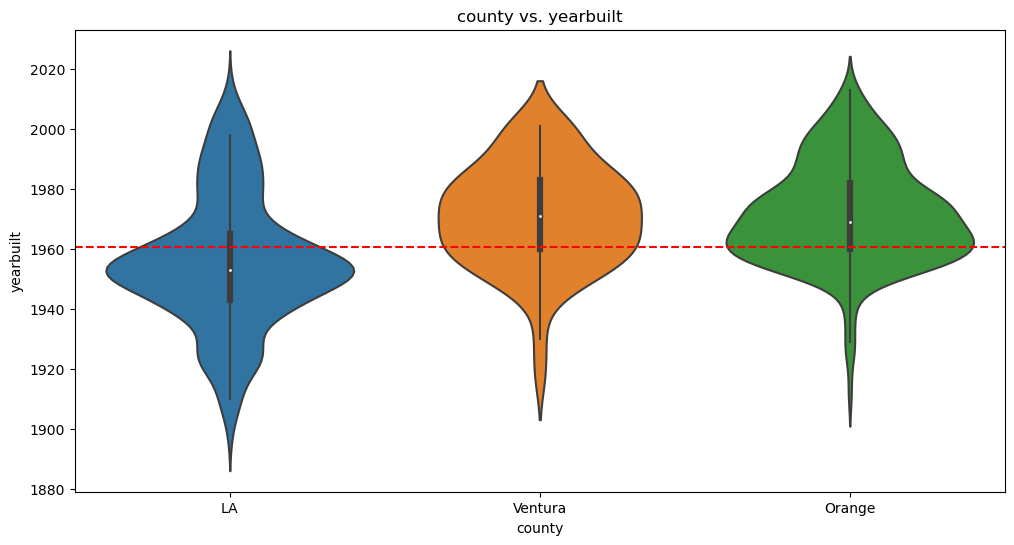

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


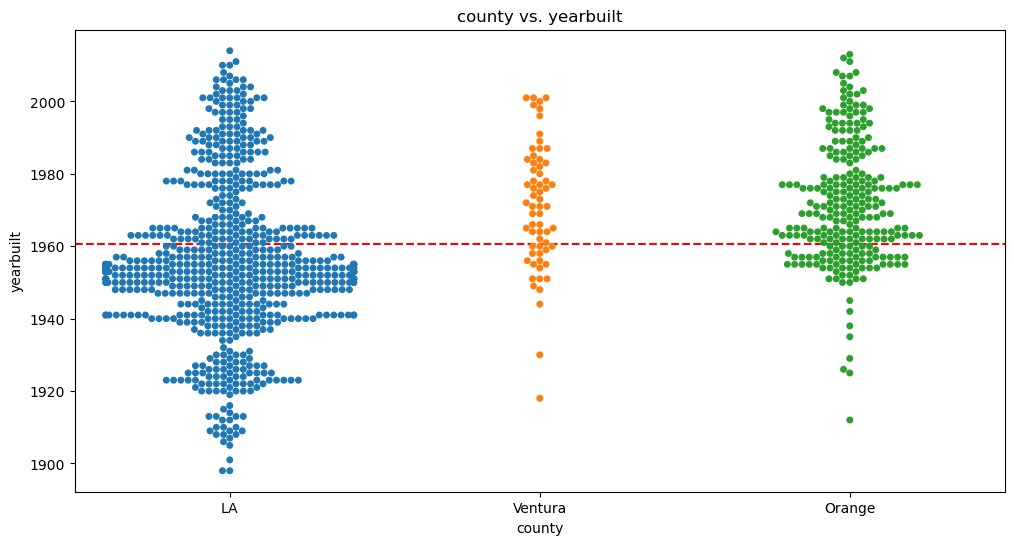

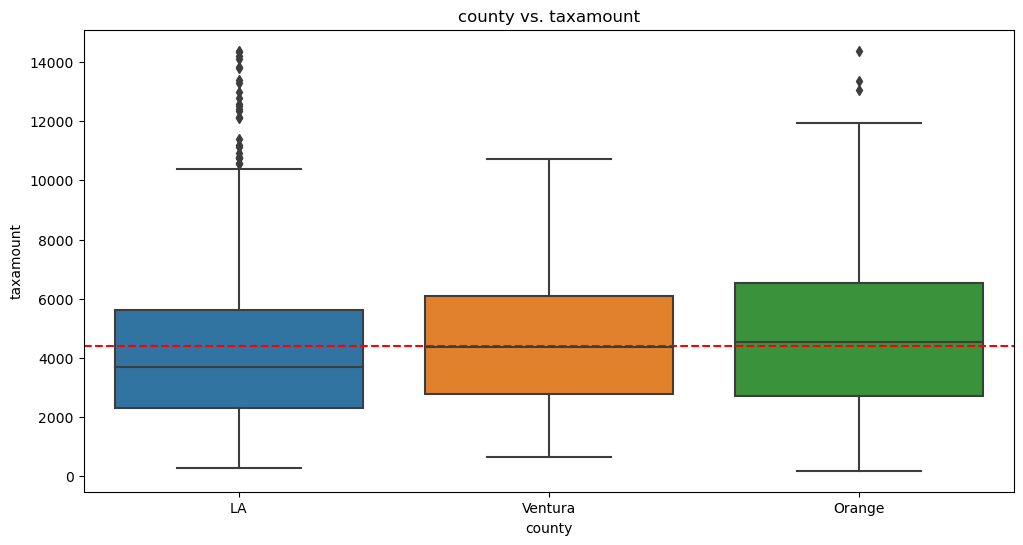

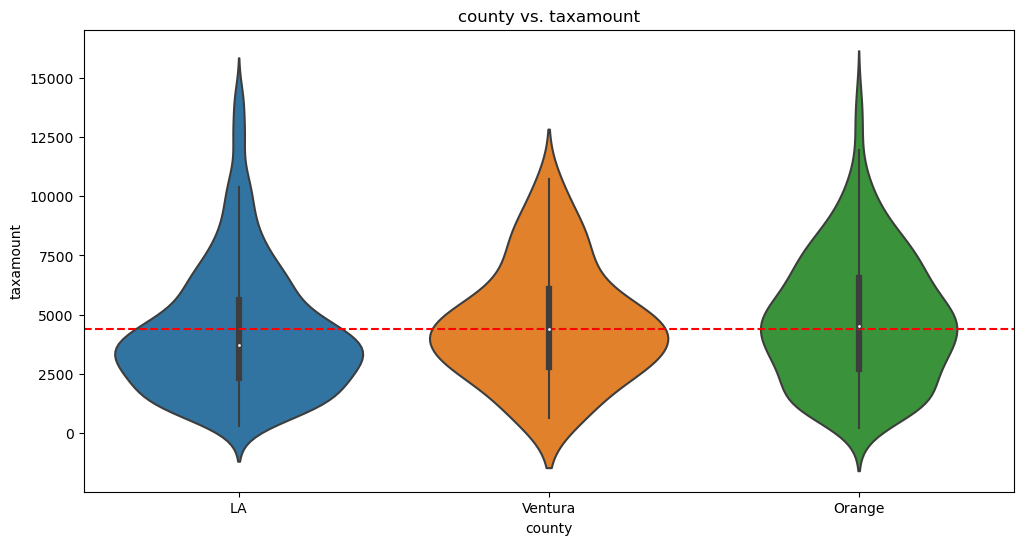

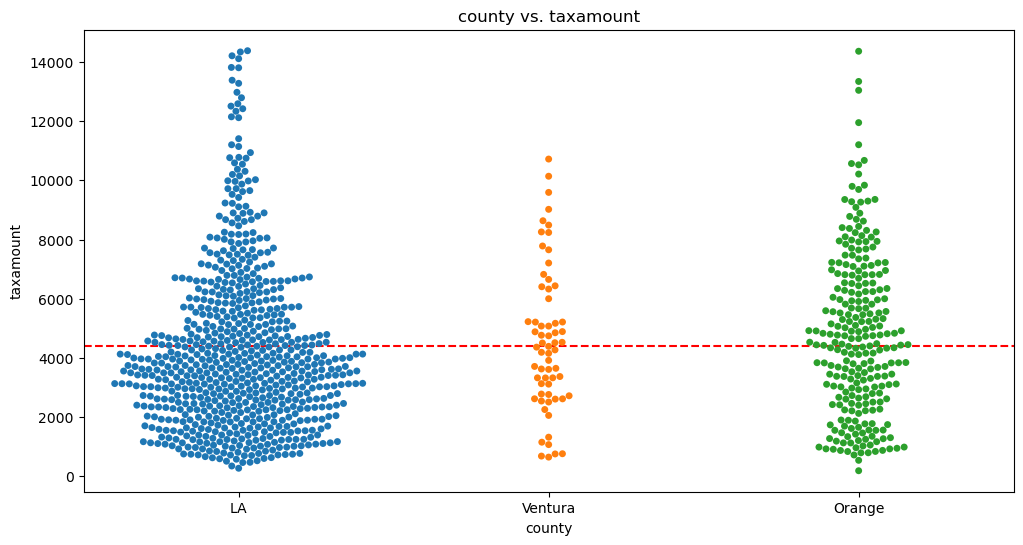

In [12]:
cat_var = 'county'
cont_var = ['bedrooms', 'bathrooms', 'area', 'taxvalue', 'yearbuilt', 'taxamount']

plot_categorical_and_continuous_vars(train_sample, cat_var, cont_var)


In [13]:
correlations = train_sample.corr()['taxvalue'].sort_values()
print(correlations)

id          -0.029159
parcelid     0.104311
bedrooms     0.238497
yearbuilt    0.257480
bathrooms    0.392086
area         0.496184
taxamount    0.959762
taxvalue     1.000000
Name: taxvalue, dtype: float64


In [14]:
def plot_correlations(df, target_var, feat_vars):
    # Calculate correlations between feature variables and target variable
    correlations = df[feat_vars].corrwith(df[target_var]).sort_values()
    target_var = 'taxvalue'
    feat_vars = ['bedrooms', 'bathrooms', 'area', 'yearbuilt', 'taxamount','county']
    # Create a bar chart to visualize correlations
    plt.figure(figsize=(10,6))
    plt.barh(correlations.index, correlations.values)
    plt.xlabel('Correlation with Target Variable')
    plt.title('Feature Variable Correlations with Target Variable')
    plt.show()


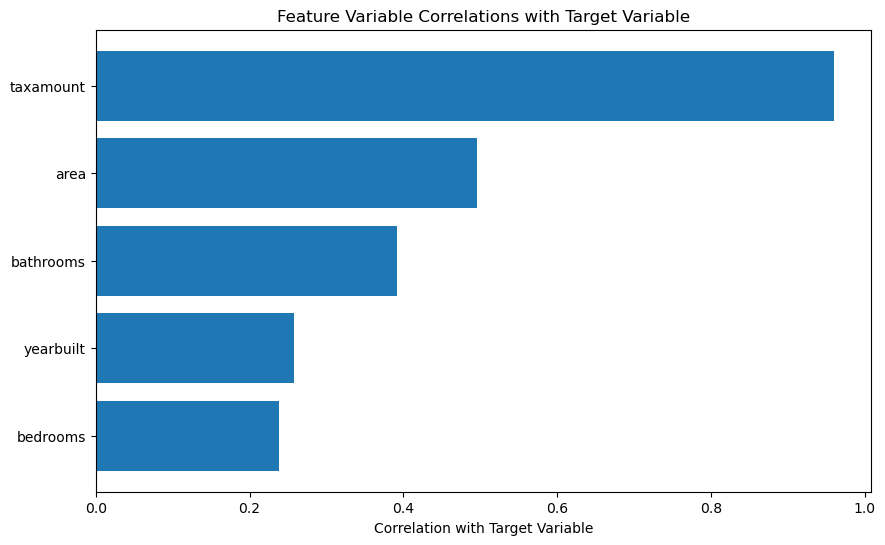

In [15]:
target_var = 'taxvalue'
feat_vars = ['bedrooms', 'bathrooms', 'area', 'yearbuilt', 'taxamount','county']

plot_correlations(train_sample,target_var, feat_vars)


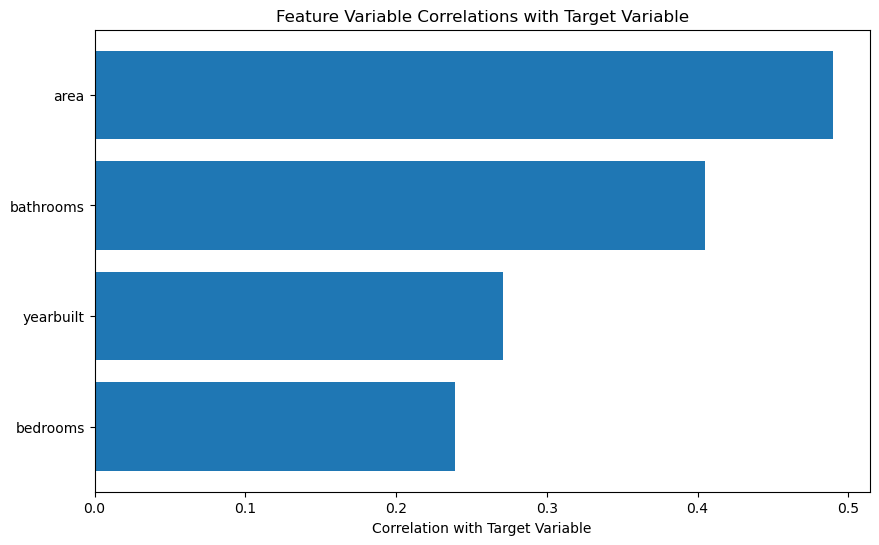

In [16]:
target_var = 'taxamount'
feat_vars = ['bedrooms', 'bathrooms', 'area', 'yearbuilt','county']

plot_correlations(train_sample,target_var, feat_vars)

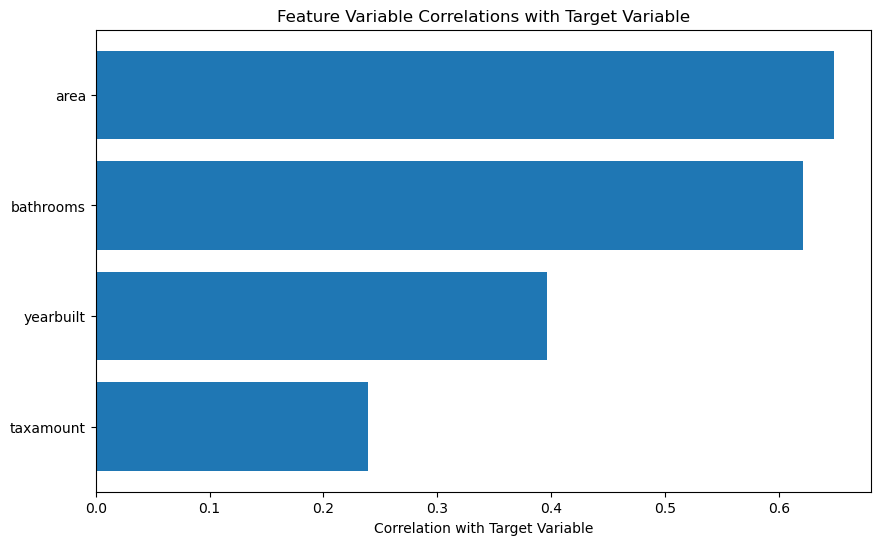

In [17]:
target_var = 'bedrooms'
feat_vars = [ 'bathrooms', 'area', 'yearbuilt', 'taxamount']

plot_correlations(train_sample,target_var, feat_vars)

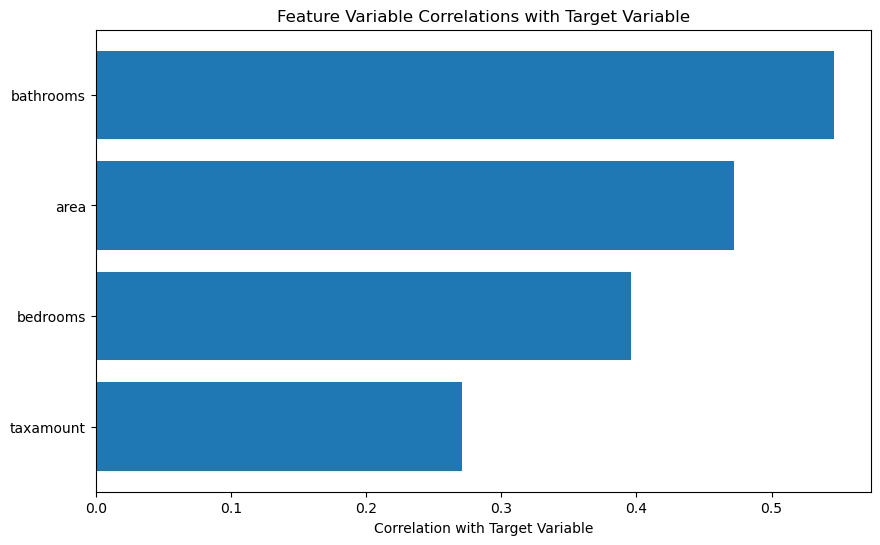

In [18]:
target_var = 'yearbuilt'
feat_vars = [ 'bathrooms', 'area', 'bedrooms', 'taxamount']

plot_correlations(train_sample,target_var, feat_vars)

In [19]:
from itertools import product

def plot_correlations(df, target_vars, feat_vars):
    # Create all combinations of target variables and feature variables
    combinations = list(product(target_vars, feat_vars))
    
    # Determine number of rows and columns for subplots grid
    num_plots = len(combinations)
    num_cols = int(num_plots ** 0.5)
    num_rows = num_plots // num_cols
    if num_plots % num_cols != 0:
        num_rows += 1
        
    # Create grid of subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 15))
    
    # Plot correlation bar charts for each combination of target and feature variable
    for i, (target_var, feat_var) in enumerate(combinations):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        corr_coeff = df[feat_var].corr(df[target_var])
        sns.barplot(x=feat_var, y=target_var, data=df, ax=ax)
        ax.set_xlabel(feat_var)
        ax.set_ylabel(target_var)
        ax.set_title(f'Correlation: {corr_coeff:.2f}')

    plt.tight_layout()
    plt.show()


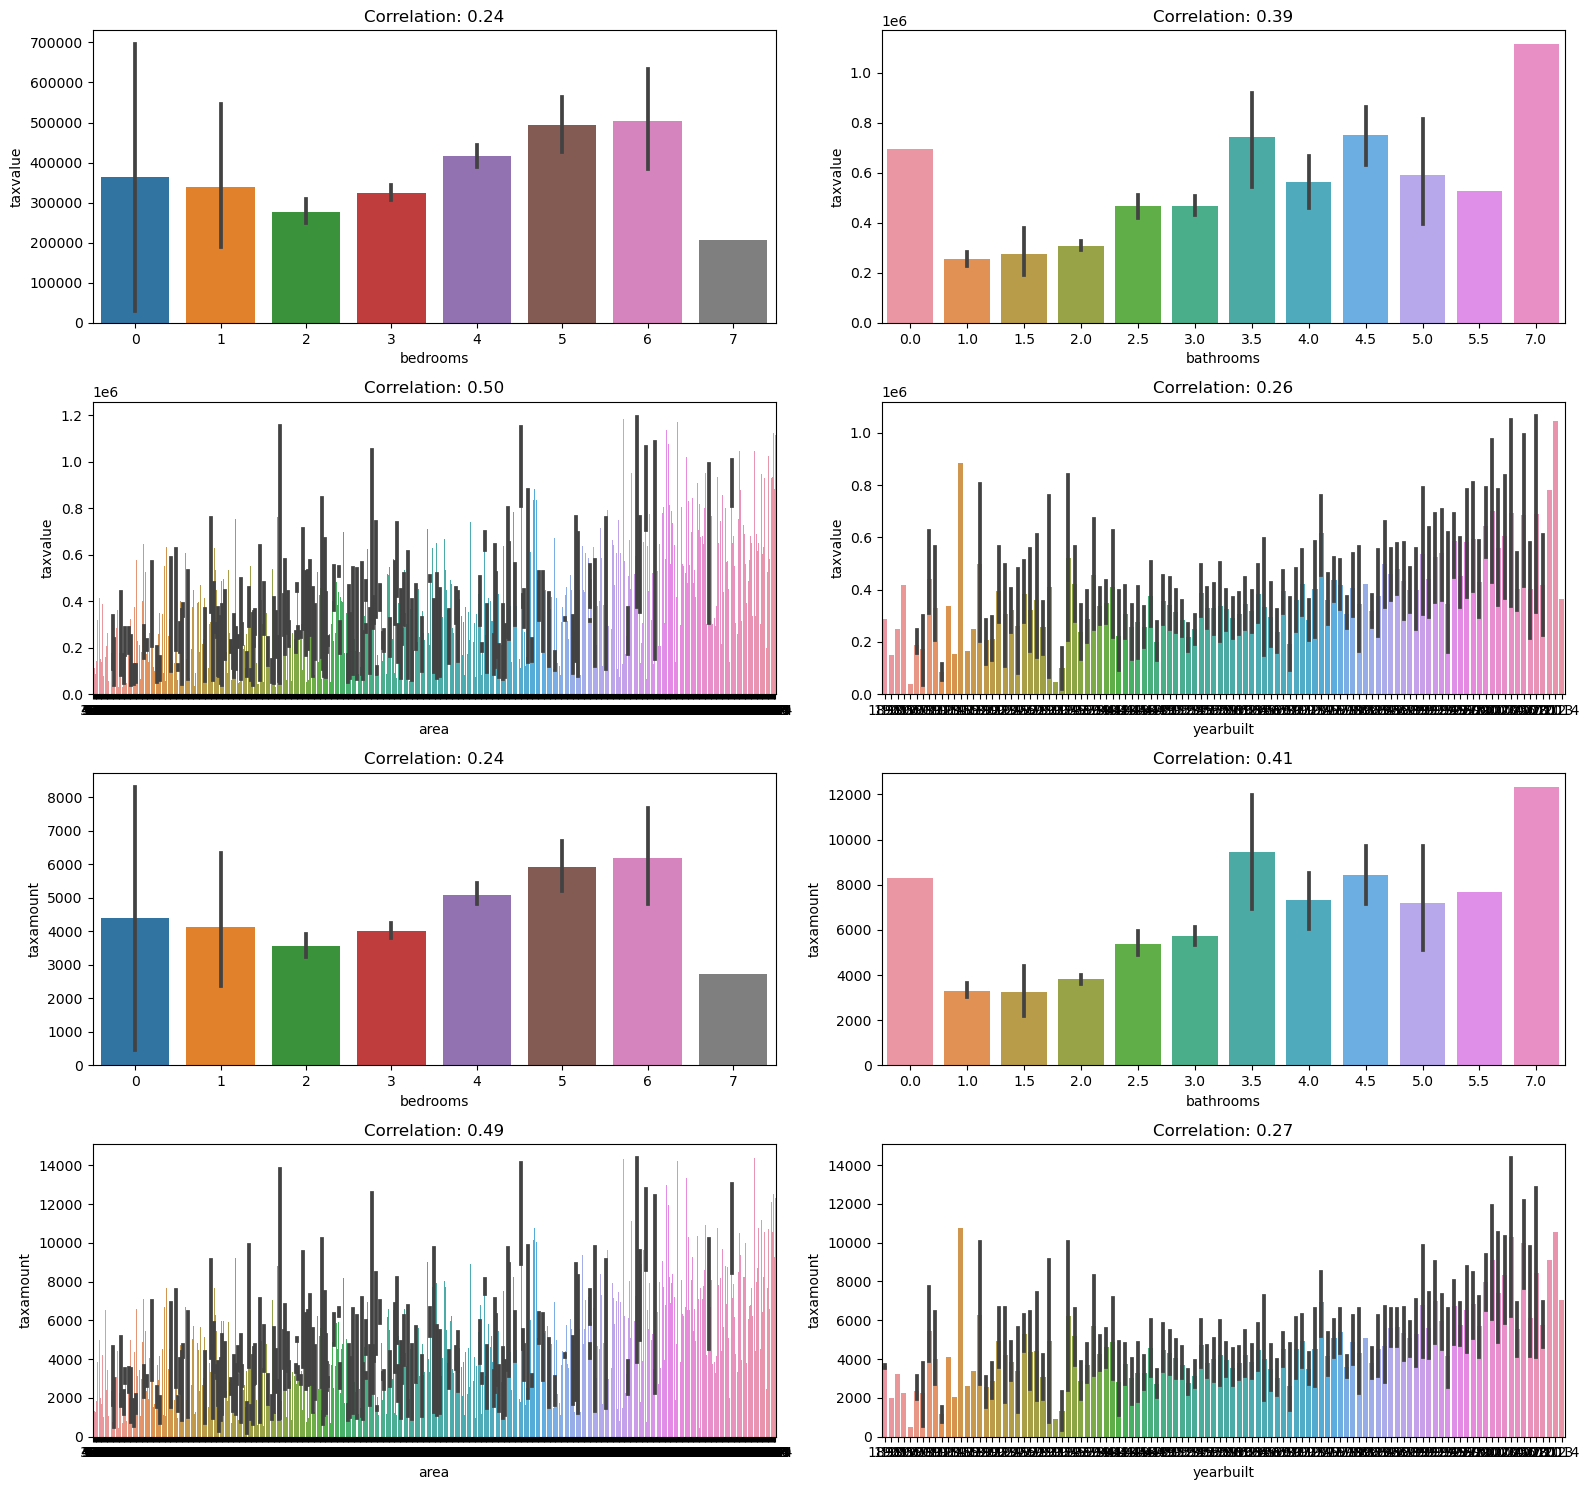

In [20]:
target_vars = ['taxvalue', 'taxamount']
feat_vars = ['bedrooms', 'bathrooms', 'area', 'yearbuilt']
plot_correlations(train_sample, target_vars, feat_vars)


In [25]:
def test_relationships(df, cat_var, cont_vars):
    # One-sample t-test for each continuous variable against the population mean
    for var in cont_vars:
        t_stat, p_value = ttest_1samp(df[var], df[var].mean())
        print(f'One-sample t-test for {var}: t={t_stat:.4f}, p={p_value:.4f}')

    # Independent t-test for each continuous variable between the two categories in the categorical variable
    for var in cont_vars:
        for cat in df[cat_var].unique():
            group1 = df[df[cat_var] == cat][var]
            group2 = df[df[cat_var] != cat][var]
            t_stat, p_value = ttest_ind(group1, group2)
            print(f'Independent t-test for {var} between {cat} and not {cat}: t={t_stat:.4f}, p={p_value:.4f}')

  # One-way ANOVA 
    for var in cont_vars:
        groups = [df[df[cat_var] == cat][var] for cat in df[cat_var].unique()]
        f_stat, p_value = f_oneway(*groups)
        print(f'One-way ANOVA for {var} by {cat_var}: F={f_stat:.4f}, p={p_value:.4f}')


In [26]:
cat_var = 'county'
cont_vars = ['bedrooms', 'bathrooms', 'area', 'yearbuilt', 'taxamount']
test_relationships(train_sample, cat_var, cont_vars)

One-sample t-test for bedrooms: t=0.0000, p=1.0000
One-sample t-test for bathrooms: t=0.0000, p=1.0000
One-sample t-test for area: t=0.0000, p=1.0000
One-sample t-test for yearbuilt: t=0.0000, p=1.0000
One-sample t-test for taxamount: t=-0.0000, p=1.0000
Independent t-test for bedrooms between LA and not LA: t=-5.5294, p=0.0000
Independent t-test for bedrooms between Ventura and not Ventura: t=2.9440, p=0.0033
Independent t-test for bedrooms between Orange and not Orange: t=4.2153, p=0.0000
Independent t-test for bathrooms between LA and not LA: t=-4.7238, p=0.0000
Independent t-test for bathrooms between Ventura and not Ventura: t=1.5386, p=0.1242
Independent t-test for bathrooms between Orange and not Orange: t=4.1687, p=0.0000
Independent t-test for area between LA and not LA: t=-5.7191, p=0.0000
Independent t-test for area between Ventura and not Ventura: t=2.2088, p=0.0274
Independent t-test for area between Orange and not Orange: t=4.8363, p=0.0000
Independent t-test for yearbuil

# Hypotheses:

### My possible questions:

1. bedrooms and tax value related?
2. bathroom and tax value related?
3. counties and what year built with the most count
4. prices of houses based on year built
5. check correlation on tax amount. what makes tax amount higher/lower?
